# How do neighborhood characteristics and accomodation type influence the pricing of Airbnb listings in New York City in 2019?"

## Introduction 

The rise of Airbnb has notably transformed urban accommodation landscapes, particularly in global cities like New York City (NYC). NYC, with its diverse neighborhoods and pivotal role as a tourism and business nexus, serves as an ideal backdrop for examining the impact of short-term rentals on local housing markets and neighborhood dynamics. This study zeroes in on the year 2019, a critical period before the COVID-19 pandemic, providing a vital baseline to understand the interplay between Airbnb listing prices, neighborhood characteristics, and room types.

At the heart of this investigation is the question: **"How do neighborhood characteristics and room type influence the pricing of Airbnb listings in New York City in 2019?"** This query underscores the hypothesis that neighborhood features (e.g., safety, accessibility, cultural attractions) and the nature of the room offered (entire home/apt, private room, shared room) are significant determinants of listing prices. The research leverages a detailed 2019 dataset of NYC Airbnb listings, which includes prices, room types, host attributes, review metrics, and availability, to explore how these factors collectively shape pricing strategies.

This study aims to illuminate the pricing dynamics within the Airbnb market, offering insights for hosts, guests, and policymakers. By analyzing the nuanced interactions between neighborhood appeal and accommodation type, the research provides a comprehensive view of the factors driving short-term rental pricing in NYC. The findings aim to inform pricing strategies, enhance guest decision-making, and guide policy discussions on the sharing economy's role in urban settings, thereby contributing to a broader understanding of the economic and social implications of platforms like Airbnb.

#### <span style="color:blue">Independent variables(X):</span>
1. **Neighbourhood group** (e.g., Mahattan, Brooklyn, Queens, Staten Island, Bronx) <br>
New York City's neighborhood groups are known to have distinct characteristics in terms of their cultural, economic, and social profiles. These differences can significantly impact the demand and perceived value of Airbnb listings in these areas. Prices in real estate and lodging often vary dramatically from one neighborhood group to another.

2.  **Neighbourhood** (e.g.,Kensington, Midtown, Harlem, etc) <br>
Even within a single neighborhood group, specific neighborhoods can have their unique appeal or drawbacks, affecting the pricing of Airbnb listings. For instance, a neighborhood's safety, proximity to tourist attractions, or nightlife can play a crucial role.This variable allows a more granular analysis than just looking at neighborhood groups. It can reveal hyper-local trends and anomalies in pricing that might not be apparent at the neighborhood group level.

3. **Room type** (e.g., Private room, Entire home/apt, Shared room) <br>
Different room types cater to different types of travelers and needs. For example, entire homes/apartments are likely more expensive than private or shared rooms, reflecting different levels of privacy, space, and amenities. Understanding how room type affects pricing can help identify what type of listings are more lucrative and in demand in various parts of the city. This is crucial for analyzing the market dynamics from both a host’s and a guest's perspective.

4. **Numer of Reviews** <br>
The number of reviews can be seen as an indicator of a listing's popularity and the level of trust guests place in it. Listings with more reviews may be perceived as more popular or trustworthy, affecting their pricing power.

#### <span style="color:blue">Dependent variable (Y):</span>
1. **Price (in dollars)** <br>
As the primary output of interest, the price reflects the monetary value placed on an Airbnb listing, encapsulating factors like demand, location quality, and type of accommodation. The volume of reviews can provide potential guests with more information to assess the quality of a listing. This perceived quality can influence what guests are willing to pay.When analyzed alongside variables like neighborhood groups, specific neighborhoods, and room types, the number of reviews adds another dimension to understand the pricing dynamics.

## Data Cleaning/Loading

In [2]:
#Import libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os 
import pandas as pd 

In [3]:
#Load Dataset 
df = pd.read_csv('AB_NYC_2019.csv', delimiter=',')
df.dataframeName = 'AB_NYC_2019.csv'

In [4]:
nRow, nCol = df.shape 
print(f'There are {nRow} rows and {nCol} columns')

There are 48895 rows and 16 columns


In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
dtypes_df = pd.DataFrame(df.dtypes, columns=['Data Type'])

dtypes_df 

,Data Type
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [8]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

price_outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
price_outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,NaN,NaN,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,NaN,NaN,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaN,NaN,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,NaN,NaN,1,9


- The dataset contains 2,972 observations, among which the price is identified as an outlier.

In [9]:
Q1 = df['number_of_reviews'].quantile(0.25)
Q3 = df['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

num_review_outliers = df[(df['number_of_reviews'] < (Q1 - 1.5 * IQR)) | (df['number_of_reviews'] > (Q3 + 1.5 * IQR))]
num_review_outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40104,31123611,JFK Airport Great place to stay 6 minutes away,232251881,Lakshmee,Queens,Jamaica,40.66823,-73.78374,Shared room,40,1,65,2019-07-06,10.00,8,346
40297,31249784,Studio Apartment 6 minutes from JFK Airport,232251881,Lakshmee,Queens,Jamaica,40.66793,-73.78452,Private room,67,1,95,2019-07-05,15.32,8,145
40424,31336245,Jfk crash pad 1-2persons in SHARED space,232251881,Lakshmee,Queens,Jamaica,40.66715,-73.78346,Shared room,39,1,65,2019-07-07,10.60,8,320
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299


- The dataset contains 6021 observations, among which the number of reviews is identified as an outlier.

In [10]:
missing_values = df.isnull().any(axis=0)
missing_values_df = pd.DataFrame(missing_values, columns=['Has Missing Values'])

missing_values_df 

,Has Missing Values
id,False
name,True
host_id,False
host_name,True
neighbourhood_group,False
neighbourhood,False
latitude,False
longitude,False
room_type,False
price,False


In [108]:
num_null = df.isnull().sum()
num_null  = pd.DataFrame(num_null , columns=['Num of Missing Value'])

num_null 

,Num of Missing Value
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [201]:
df1 = df.dropna()
df1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_reduced
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Other
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Midtown
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Other
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Other
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147,Upper East Side
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339,Other
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87,Other
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40,Other


- df1 is the new data frame that dropped observations with missing values. df1 will not be used in Project 1 as there are no missing values in the chosen independent variables. 

In [123]:
df.duplicated().sum() 

0

- No duplicate entries are present in the dataset.

## Summary Statistics Table

In [220]:
variables = ['neighbourhood_group', 'neighbourhood', 'room_type', 'number_of_reviews', 'price']

summary_df = pd.DataFrame()

for var in variables:
    description = df[var].describe(include='all').to_frame().transpose()
    description.index = [var]
    summary_df = pd.concat([summary_df, description], axis=0)
    
summary_df

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_reviews,48895.0,NaN,NaN,NaN,23.27,44.55,0.0,1.0,5.0,24.0,629.0
price,48895.0,NaN,NaN,NaN,152.72,240.15,0.0,69.0,106.0,175.0,10000.0


**Count**: There are 48,895 entries or listings in the dataset
<br>
<br>
**Neibourhood group (X1)**
<br> 
> - **Unique:** The data set focuses on 5 unique neighbourhood groups.   <br> 
> - **Top/Frequency:** The most common neighbourhood group is Manhattan, with 21,661 listings. This suggests that Manhattan is the most listed area in the dataset. 
<br>

**Neighbourhood (X2)** 
<br> 
> - **Unique:** There are 221 unique neighbourhoods. This suggests a very detailed level of data granularity, allowing for an in-depth analysis of location-based pricing strategies. <br> 
>  - **Top/Frequency:** Williamsburg is the most common neighbourhood with 3,920 listings. This could mean that Williamsburg is a popular area for Airbnb listings or it could reflect a specific trend or preference among Airbnb hosts or guests in New York City.
<br>

**Room Type (X3)** <br> 
> - **Unique:** There are 3 unique room types. This limited number of categories can make it easier to analyze and compare the impact of room type on pricing. <br> 
> - **Top/Frequency:** The most common room type is "Entire home/apt" with 25,409 listings. This prevalence suggests that entire homes or apartments are a popular choice on Airbnb. 

**Number of Reviews (X4)** 
> - **Mean:** On average, a listing has about 23.27 reviews. <br>
> - **Standard Deviation (std):** The high standard deviation of approximately 44.55 suggests that the number of reviews per listing varies widely.<br>
> - **Minimum:** The minimum number of reviews is 0, indicating that there are some listings without any reviews.<br>
> - *25th Percentile:** 25% of the listings have 1 or fewer reviews, showing a significant number of listings with very few reviews. <br>
> - **Median (50%):** The median value is 5 reviews, which means that half of the listings have more than 5 reviews and half have fewer. The median is much lower than the mean, suggesting that the distribution of reviews is right-skewed with some listings having a very high number of reviews.<br>
> - **75th Percentile:**  75% of listings have 24 or fewer reviews. This further indicates the presence of listings with a very high number of reviews, which could be outliers influencing the mean.<br>
> - **Maximum:** The maximum number of reviews is 629, which is much higher than the mean and median, confirming the right-skewed distribution.
<br>
<br>

**Price (Y)**
> - **Mean:** The average price for a listing is approximately \\$152.72. This is a starting point for understanding the typical cost but doesn't capture the full picture of pricing. <br>
> - **Standard Deviation (std):** The standard deviation is very high at approximately \\$240.15, indicating a large variation in pricing among listings. <br>
> - **Minimum:** The minimum price is \\$0, which might indicate free listings, a data entry error, or special promotions. <br>
> - **25th Percentile:** The 25th percentile is \\$69, indicating that a quarter of the listings are priced at \\$69 or less. <br>
> - **Median (50%):** The median price is \\$106, which, like with reviews, is lower than the mean, suggesting that there are some very high-priced listings that are pulling the average up. <br>
> - **75th Percentile:** At the 75th percentile, listings are priced at \\$175 or less. <br>
> - **Maximum:** The maximum price is \\$10,000, which is exceptionally high compared to the rest of the data and likely represents luxury or unique listings.

## Plots, Histograms, Figures 

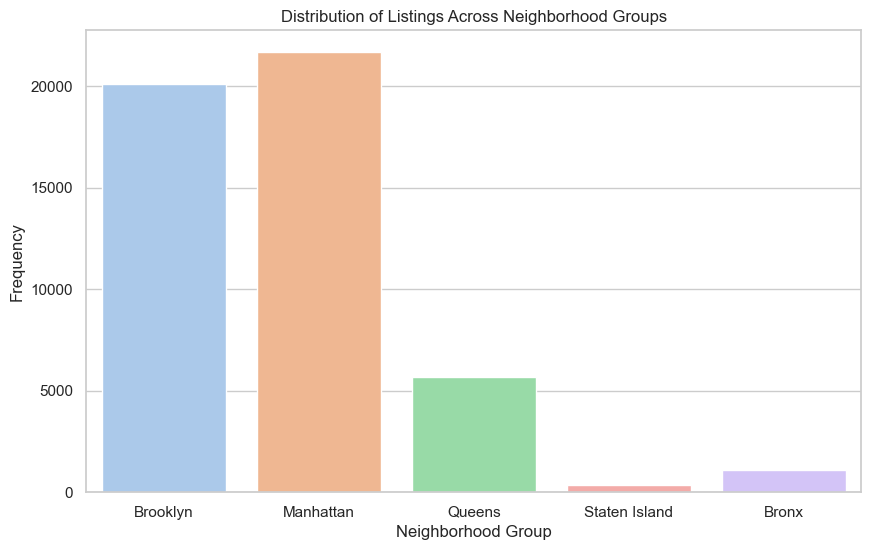

In [20]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df, palette='pastel', ax=ax)

ax.set_title('Distribution of Listings Across Neighborhood Groups')
ax.set_xlabel('Neighborhood Group')
ax.set_ylabel('Frequency')

plt.show()

- The observed pattern indicates that Airbnb activity is not evenly distributed across New York City's boroughs, with a clear preference for Brooklyn and Manhattan. This uneven distribution suggests that these boroughs are likely to exhibit distinct pricing behaviors due to their higher demand and popularity, which is crucial for analyzing the impact of neighborhood characteristics on pricing in the Airbnb market.

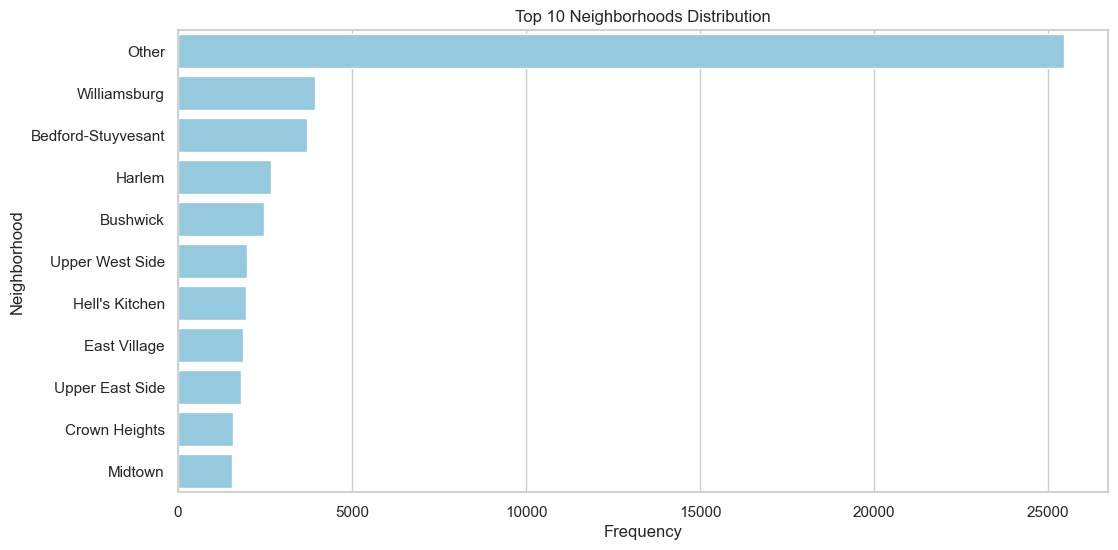

In [249]:
counts = df['neighbourhood'].value_counts()

# Keep only the top N categories and group the rest as 'Other'
N = 10
top_n = counts[:N].index
df['neighbourhood_reduced'] = df['neighbourhood'].where(df['neighbourhood'].isin(top_n), 'Other')

plt.figure(figsize=(12, 6))
sns.countplot(y='neighbourhood_reduced', data=df, order=df['neighbourhood_reduced'].value_counts().index, color='skyblue')

plt.title('Top 10 Neighborhoods Distribution')
plt.xlabel('Frequency')
plt.ylabel('Neighborhood')

plt.show()

- The dataset encompasses 221 neighborhoods; to effectively visualize this, a 'Top 10' strategy was employed, showcasing the neighborhoods with the highest number of Airbnb listings in NYC. Williamsburg and Bedford-Stuyvesant emerge as the neighborhoods with a notably higher concentration of listings, while the remaining listings are more evenly distributed among the other neighborhoods.

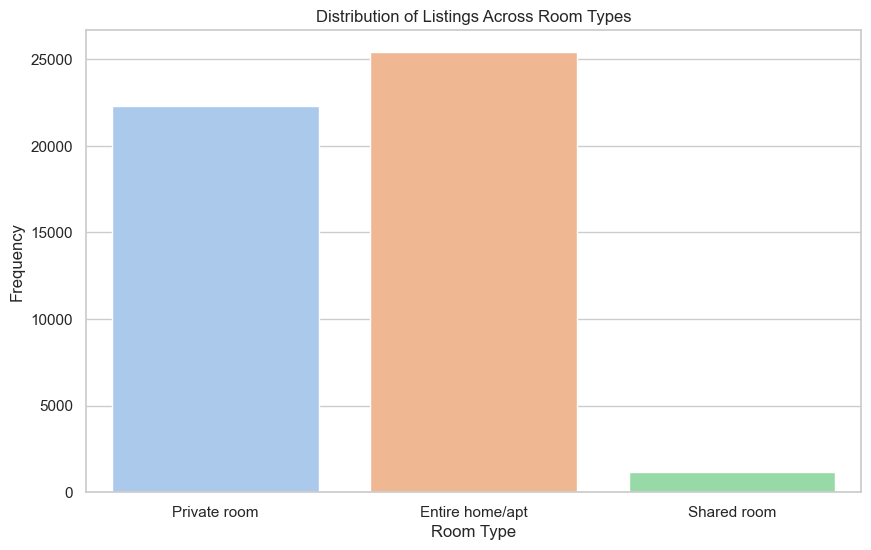

In [19]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='room_type', data=df, palette='pastel', ax=ax)

ax.set_title('Distribution of Listings Across Room Types')
ax.set_xlabel('Room Type')
ax.set_ylabel('Frequency')

plt.show()

- The countplot reveals a dominant trend in NYC's Airbnb listings, heavily favoring entire homes/apartments and private rooms over shared rooms. This preference reflects market demand for more private and spacious accommodations, likely influencing higher price points for these types of listings. Such a distribution is crucial for assessing the impact of room type on Airbnb pricing within the city's competitive lodging market.

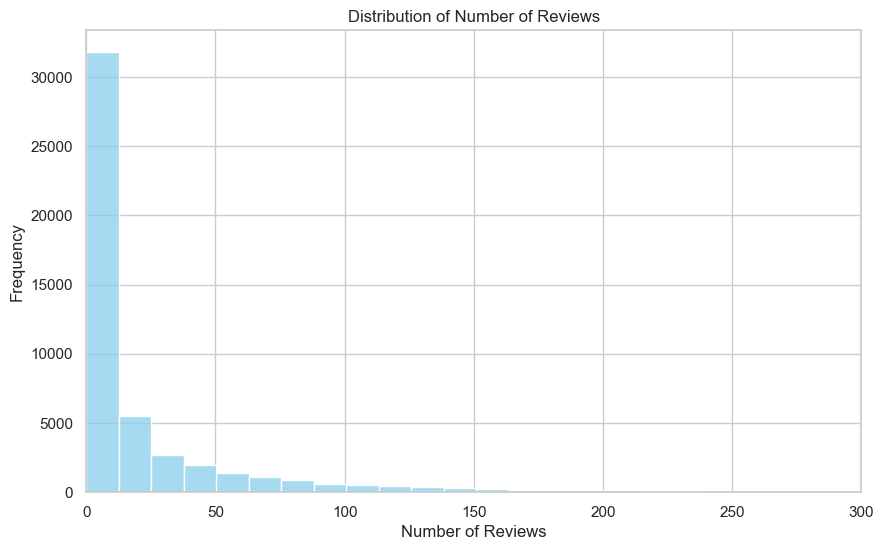

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], bins=50, kde=False, color='skyblue')

plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xlim(0, 300) #Limited range of x-axis to better illustrate the shape of the distribution 

plt.show()

- To enhance the readability of the histogram illustrating the distribution of review counts for Airbnb listings, which exhibits a right-skewed pattern indicating that the majority of listings have a low number of reviews, with only a few listings receiving a large number of reviews, I limited the range of the data. This approach allows for a clearer visualization of the data distribution, enabling us to still observe the overall trend without the distortion caused by extreme values. This adjustment is particularly useful in highlighting the variability in listing popularity or engagement. Listings that accumulate a higher number of reviews may be able to command premium pricing, reflecting increased demand often driven by factors such as desirable neighborhood characteristics or preferred accommodation types. Such trends underline the importance of location desirability and the nature of the accommodation in determining Airbnb pricing strategies in New York City.

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=100, kde=False, color='skyblue')

plt.title('Distribution of Airbnb Listing Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Frequency')
plt.xlim(0, 1500)

plt.show()

- To increase the readability of the plot and better illustrate the distribution of prices for NYC Airbnb listings, the data range has been limited and outliers removed. This methodological adjustment, crucial for enhancing the clarity of the histogram, ensures that the positively skewed nature of the price distribution is preserved. It effectively highlights that while the market is predominantly composed of affordable options, there is a notable presence of premium-priced listings. This variation in pricing is largely influenced by factors such as desirable locations, superior room types, or luxury amenities, which are key to understanding the pricing dynamics within the Airbnb market in New York City.

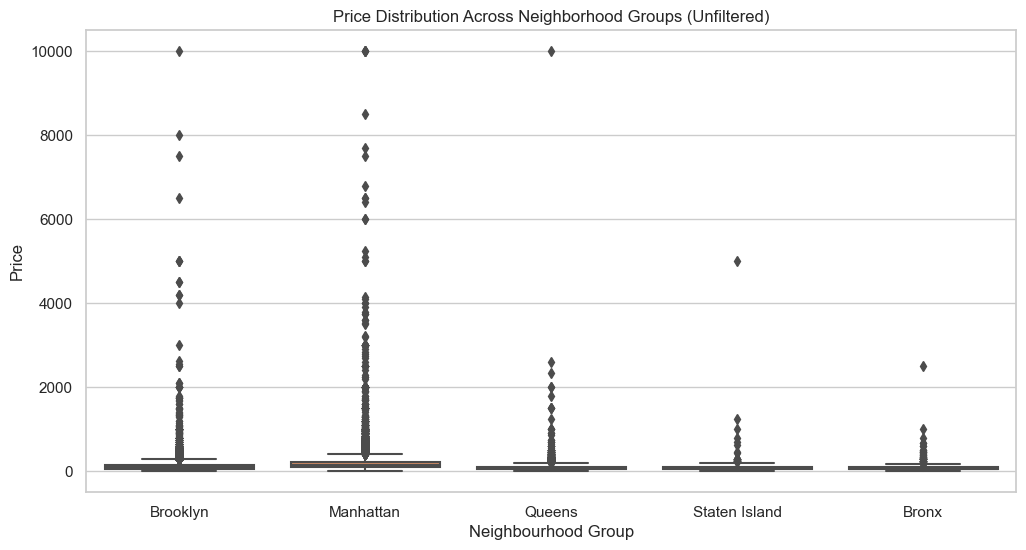

In [297]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)

plt.title('Price Distribution Across Neighborhood Groups (Unfiltered)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')

plt.show()

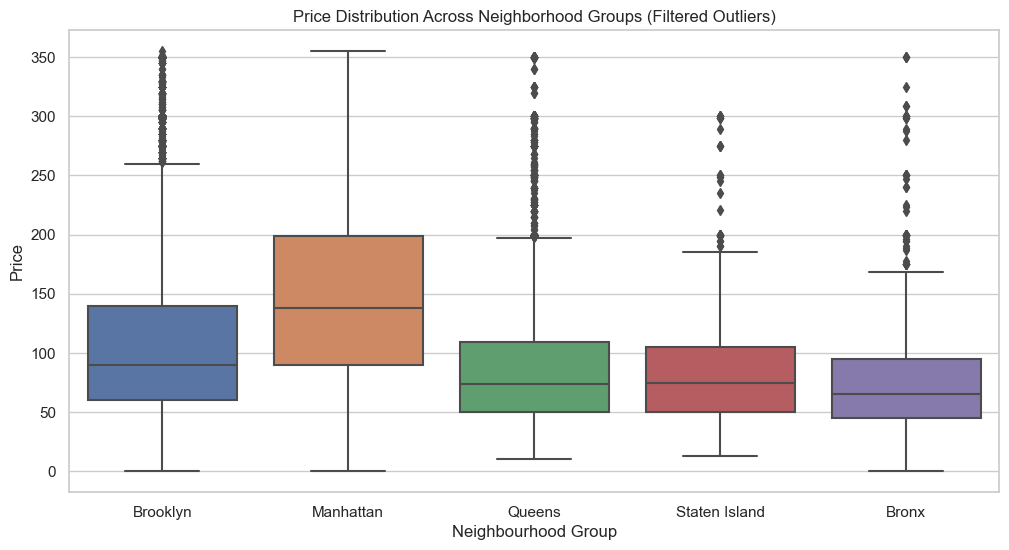

In [296]:
upper_limit = df['price'].quantile(0.95)
filtered_df = df[df['price'] <= upper_limit]

plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=filtered_df)

plt.title('Price Distribution Across Neighborhood Groups (Filtered Outliers)')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

- The box plot, refined by excluding data above the 95th percentile, presents a clearer view of Airbnb pricing trends across New York City neighborhoods, highlighting typical price ranges while controlling for extreme outliers. Manhattan emerges with the highest median prices and a wide interquartile range, reflecting substantial price variability and indicating a market that can sustain higher rental costs, possibly due to its prime location and attractiveness to renters. In contrast, Brooklyn shows moderately high median prices with a more compressed interquartile range, signaling less price fluctuation. Queens, Staten Island, and the Bronx exhibit lower median prices and narrow interquartile ranges, pointing to a more uniform pricing approach and suggesting that these areas may be less affected by the premium associated with location. This pattern of pricing suggests a clear correlation between neighborhood desirability and Airbnb pricing strategies, with central, popular locations commanding higher prices, thereby aligning with the research inquiry into the influence of location on accommodation pricing in urban settings.

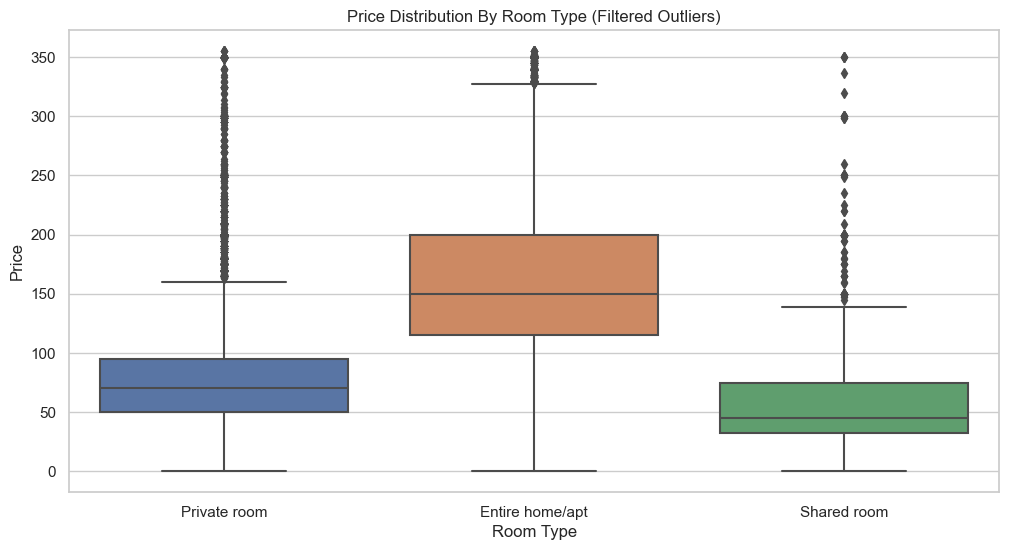

In [21]:
upper_limit = df['price'].quantile(0.95)
filtered_df = df[df['price'] <= upper_limit]

plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=filtered_df)

plt.title('Price Distribution By Room Type (Filtered Outliers)')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

- This box plot displays the price distribution for three room types. The median price for entire homes/apartments is the highest, with a wide interquartile range, indicating significant price variation within this category. Private rooms have a lower median price and a narrower interquartile range, showing less price variability. Shared rooms have the lowest median price and the smallest interquartile range, suggesting the least price variation among the three types. The information from this plot is valuable for researching pricing strategies, as it suggests that the type of room is a major determinant of price. The greater price range for entire homes/apartments implies a higher revenue potential, which could influence hosts to prefer offering their properties as entire units rather than shared spaces. This could have implications for market supply dynamics and overall pricing models within the Airbnb market in New York City.

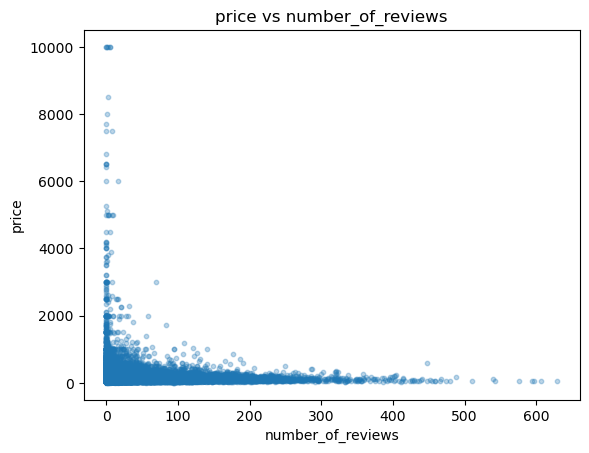

In [130]:
df.plot.scatter('number_of_reviews', 'price',alpha=0.3,s=10)
plt.title('price vs number_of_reviews')
plt.ylabel('price')
plt.plot()
plt.show()

[]

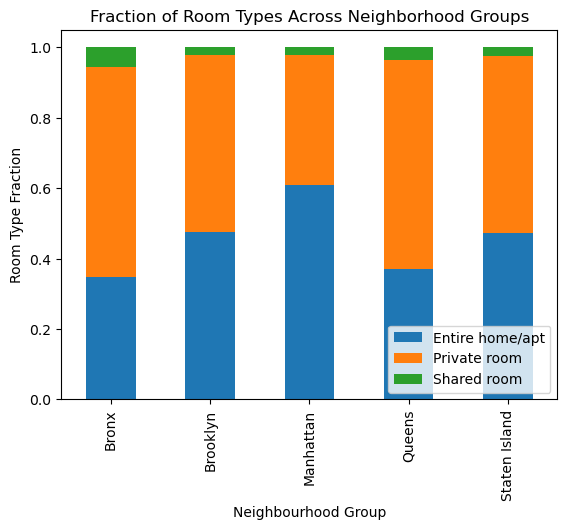

In [15]:
count_matrix = df.groupby(['neighbourhood_group', 'room_type']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Room Type Fraction')
plt.xlabel('Neighbourhood Group')
plt.legend(loc=4)
plt.title("Fraction of Room Types Across Neighborhood Groups")
plt.plot()

- This matrix illustrates that entire homes/apartments constitute the majority of listings in every neighborhood, followed by private rooms. Shared rooms represent the smallest fraction in each neighborhood, with an almost negligible presence in some areas.The prevalence of entire homes/apartments being listed, particularly in Manhattan and Brooklyn, suggests a trend towards renting out entire properties, which may command higher prices compared to private or shared rooms. This observation contributes to the research question by indicating that room type is a significant factor in pricing strategies. It implies that neighborhoods with a higher fraction of entire homes/apartments could be associated with higher overall rental prices, as these types of accommodations typically offer more privacy and space, and thus, could be more in demand.

[]

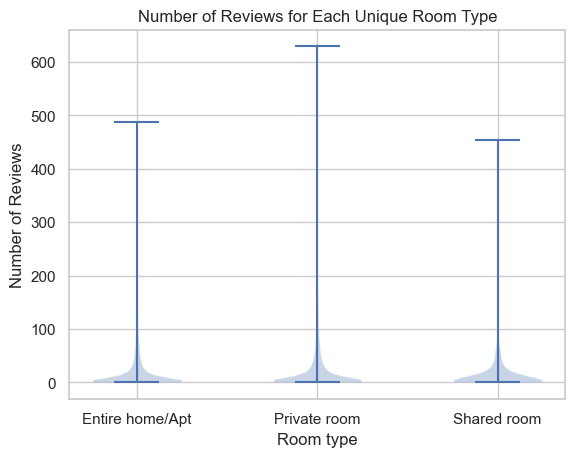

In [166]:
dataset = [df[df['room_type']=='Entire home/apt']['number_of_reviews'].values,
           df[df['room_type']=='Private room']['number_of_reviews'].values,
           df[df['room_type']=='Shared room']['number_of_reviews'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['Entire home/Apt','Private room','Shared room'])
plt.ylabel('Number of Reviews')
plt.xlabel('Room type')
plt.title("Number of Reviews for Each Unique Room Type")
plt.plot()

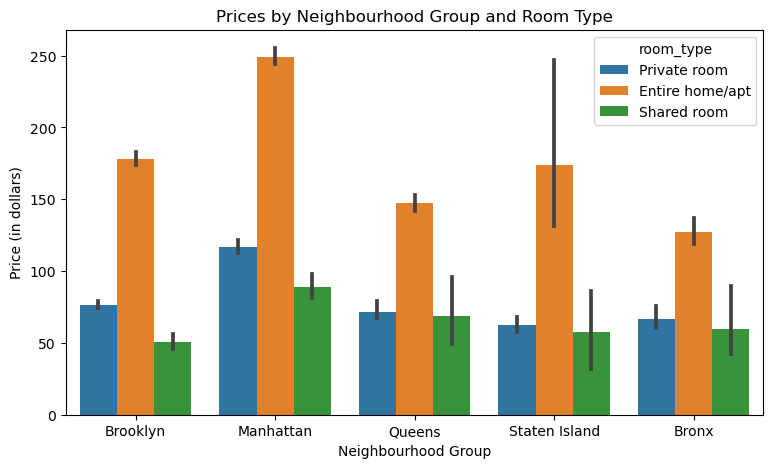

In [14]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.set_title('Prices by Neighbourhood Group and Room Type')
sns.barplot(x="neighbourhood_group", y="price", hue="room_type", data=df, ax=ax)

ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Price (in dollars)')

plt.show()

## Conclusion

Paragraph 1: this is what I tried to look for, what i got so far 

Paragraph 2: what else can help me draw to my conclusion 